##  Linear Regression Revision Task

### Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Load Dataset

In [5]:
df = pd.read_csv(r"D:\Buildables Internship\BuildablesDataScienceFellowship\Task#10\Student_Performance.csv")

# Show first few rows
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


###  Step 3: Data preprocessing

In [6]:
# Encode categorical variable (Extracurricular Activities: Yes -> 1, No -> 0)
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})

# Define features (X) and target (y)
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

### Step 4: Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###  Step 5: Fit linear regression model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Step 6: Predict on test set

In [9]:
y_pred = model.predict(X_test)

### Step 7: Evaluate model (MSE and R²)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 4.082628398521853
R-squared (R²): 0.9889832909573145


### Step 8: Plot Actual vs. Predicted values

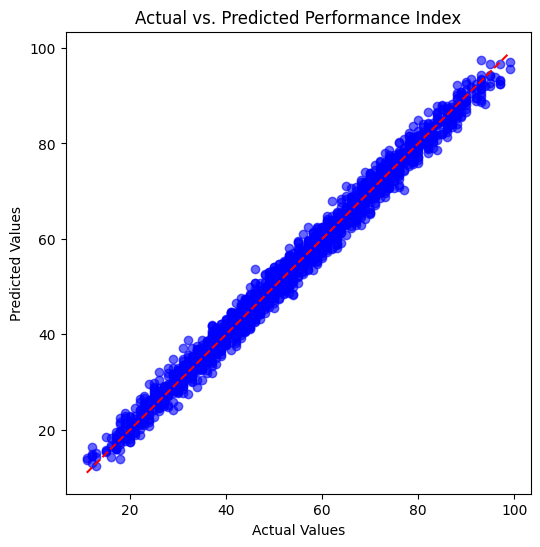

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Performance Index")
plt.show()

### Step 9: Scatter plot of Predicted vs. Actual

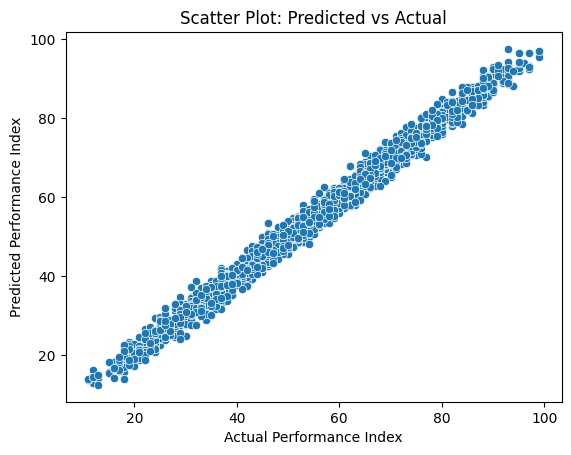

In [12]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Scatter Plot: Predicted vs Actual")
plt.show()

### Step 10: Interpret coefficients

In [13]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("Intercept:", model.intercept_)
coefficients

Intercept: -33.921946215556126


,Feature,Coefficient
0,Hours Studied,2.852484
1,Previous Scores,1.016988
2,Extracurricular Activities,0.608617
3,Sleep Hours,0.476941
4,Sample Question Papers Practiced,0.191831


### Step 11: Interpretation text ( just to show clear result for my own satisfication)

In [14]:
print("Interpretation of coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    impact = "positive" if coef > 0 else "negative"
    print(f"- {feature}: A one unit increase leads to a {abs(coef):.2f} {impact} change in Performance Index (holding other factors constant).")

Interpretation of coefficients:
- Hours Studied: A one unit increase leads to a 2.85 positive change in Performance Index (holding other factors constant).
- Previous Scores: A one unit increase leads to a 1.02 positive change in Performance Index (holding other factors constant).
- Extracurricular Activities: A one unit increase leads to a 0.61 positive change in Performance Index (holding other factors constant).
- Sleep Hours: A one unit increase leads to a 0.48 positive change in Performance Index (holding other factors constant).
- Sample Question Papers Practiced: A one unit increase leads to a 0.19 positive change in Performance Index (holding other factors constant).
